# Project Description

In this project, we will implement a credit card fraud detection model. The dataset contains the transaction made by credit cards in September 2013 by European cardholders.

The dataset contains the transactions that occur in two days with 492 fraud cases out of 284,807 transactions, making it highly imbalanced. It includes numerical features obtained through PCA, with 'Time' representing seconds elapsed since the first transaction and 'Amount' indicating the transaction amount. The 'Class' feature distinguishes fraud(1) from non-fraud(0). 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score

import scipy.stats
from imblearn.over_sampling import SMOTE
from collections import Counter

from prettytable import PrettyTable
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

# Check data info

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("shape of dataset", df.shape)

shape of dataset (284807, 31)


The dataset has 31 features and 284807 observations

### Checking data type of features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As we can see that all the feature are numeric features

### Checking for missing values

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We do not have missing values in the dataset, so we do not have to worry about it.

### Checking statistics of each features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We can observe that the standard deviation of amount is very high which is around 250 dollars.

# Exploratory Data Analysis

### Checking class distribution

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

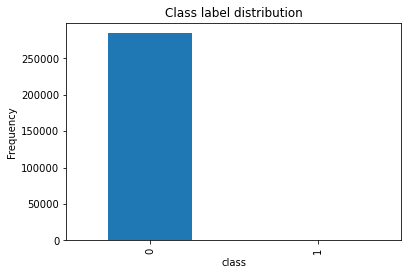

In [9]:
class_count =  pd.value_counts(df['Class'], sort=True)
class_count.plot(kind='bar')
plt.title("Class label distribution")
plt.xlabel("class")
plt.ylabel("Frequency")

    We have highly imbalance dataset. Therefore, model might overfit to predict only the class label having high frequency. Therefore, we need to perform some sampling operation to balance the dataset.

### Checking distribution of Amount feature

In [10]:
class_legitimate = df[df['Class']==0]
class_fraud = df[df['Class']==1]
class_legitimate['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
class_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
print(class_legitimate['Amount'].quantile(0.98))
print(class_fraud['Amount'].quantile(0.98))

690.0
938.0828000000005


Earlier, we saw that Amount feature has high standard deviation, when we look at the nature of Amount feature for each class Fraud and non-fraud, we can see that both class have high standard deviation. And the maximum amount for fraud transaction is around 2 thousand dollar compared to 25 thousand dollar for non-fraudulant transaction.

We can also see that almost 98% of transaction is below 1000 dollar in both the classes. This suggests that transaction above 1000 dollar is very rare incase of both classes.

### Understanding correlation between Amount and Time

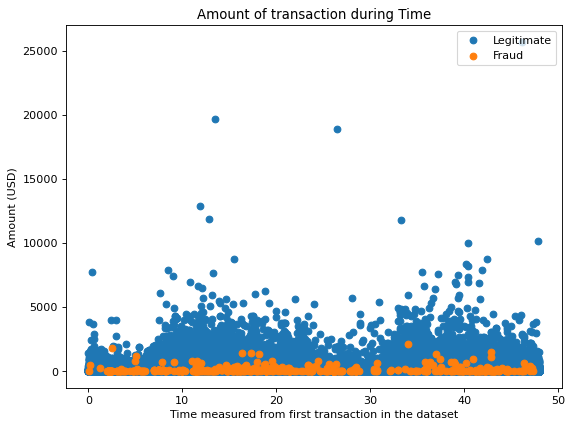

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter((class_legitimate['Time']/(3600)), class_legitimate['Amount'], alpha=1, label='Legitimate')
plt.scatter((class_fraud['Time']/(3600)), class_fraud['Amount'], alpha=1, label='Fraud')
plt.title("Amount of transaction during Time")
plt.xlabel("Time measured from first transaction in the dataset")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

### Correlation between time and number of transaction

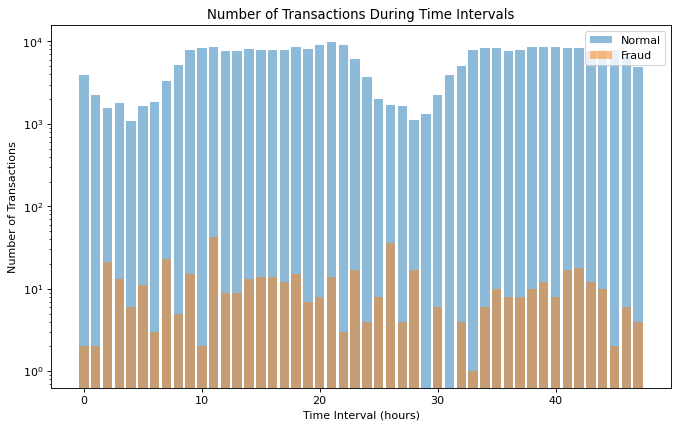

In [14]:
# Define the time interval (e.g., in hours)
time_interval_hours = 1

legitimate_transaction_counts = class_legitimate.groupby((class_legitimate['Time'] / (3600 * time_interval_hours)).astype(int)).size()
fraud_transaction_counts = class_fraud.groupby((class_fraud['Time'] / (3600 * time_interval_hours)).astype(int)).size()

# Create a time range for the x-axis
time_intervals = range(int(max(class_legitimate['Time'] / (3600 * time_interval_hours))) + 1)

# Ensure that normal and fraud transaction counts have the same shape by filling missing intervals with zeros
combined_legitimate_counts = [legitimate_transaction_counts.get(interval, 0) for interval in time_intervals]
combined_fraud_counts = [fraud_transaction_counts.get(interval, 0) for interval in time_intervals]

figure(figsize=(10, 6), dpi=80)
plt.bar(time_intervals, combined_legitimate_counts, alpha=0.5, label='Normal')
plt.bar(time_intervals, combined_fraud_counts, alpha=0.5, label='Fraud')
plt.yscale('log') 
plt.title("Number of Transactions During Time Intervals")
plt.xlabel("Time Interval (hours)")
plt.ylabel('Number of Transactions')
plt.legend(loc='upper right')
plt.show()

Here time is the amount of time elapsed from the first transaction. If we see at the frequency of transaction in each class label, for a non-fraudulant transaction, there is a pattern. The transaction increases during 12-20 hours and again same pattern is observed for next 24hrs cycle. Since this dataset contains transaction for 2 days, we can map the hours elapsed from first transaction to time in a day and identify during which hours of the day non-fraudulant transaction increase, become stable and decrease again. 

In case of fraudulant transaction, we cannot clearly identify any pattern during the hours.

### Visualize the distribution of each feature based on the class label

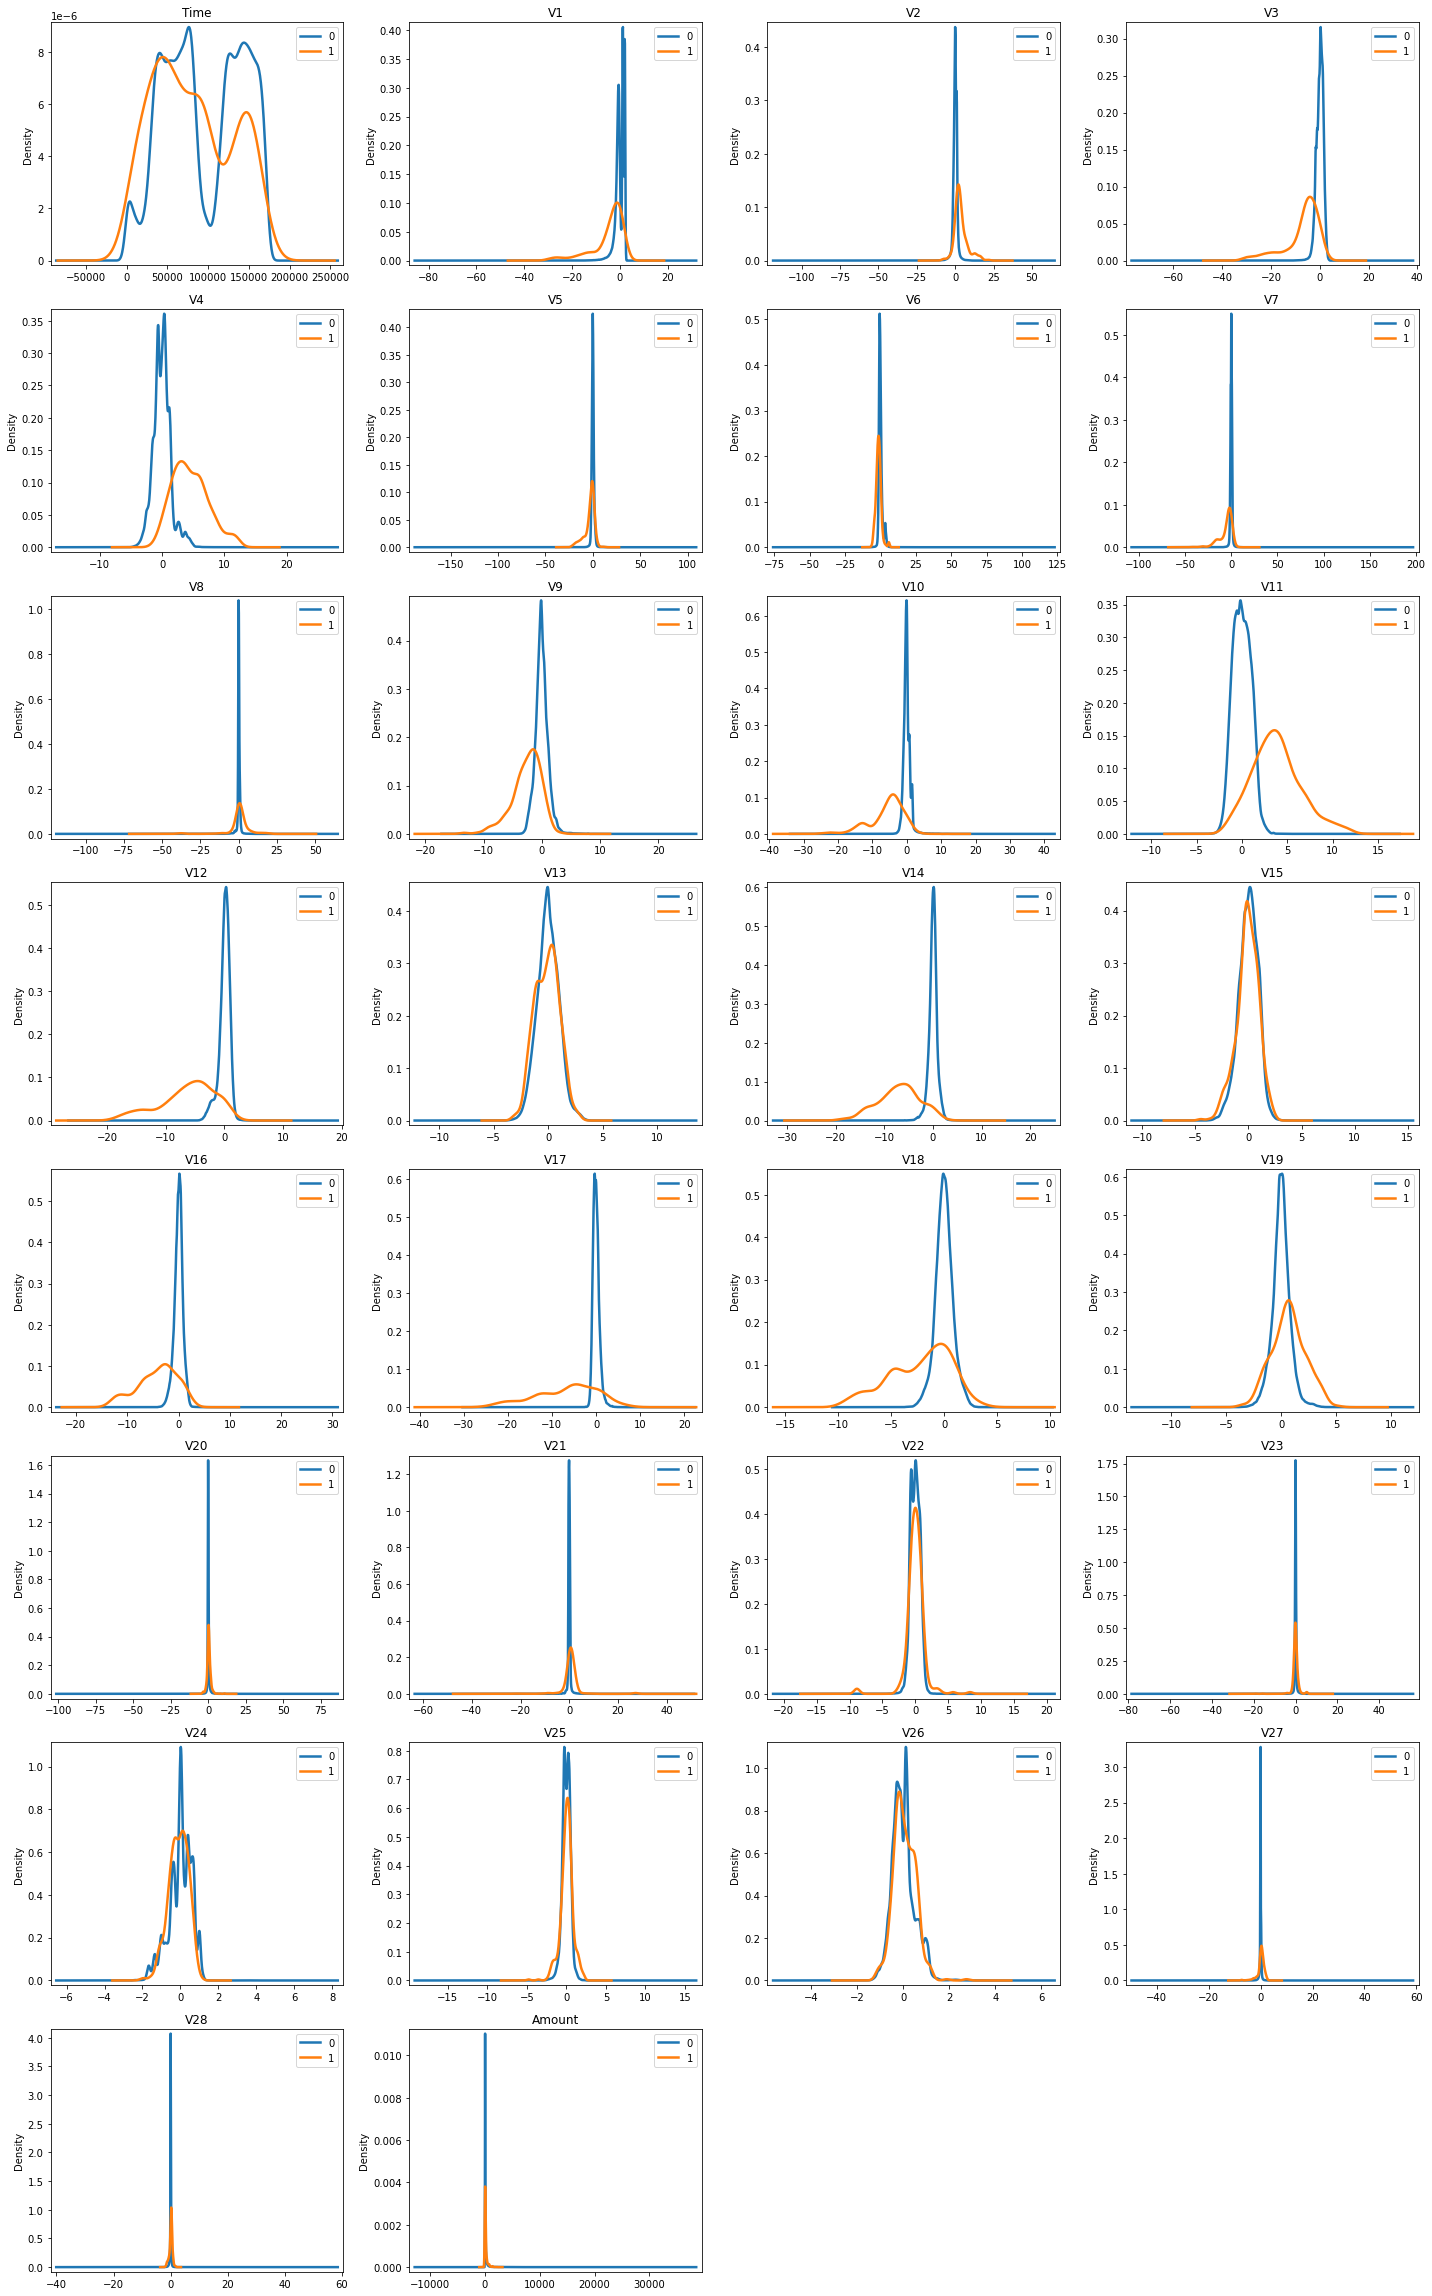

In [15]:
# Scatter subplots
plt.figure(figsize=(20,32))
for plot, feat in enumerate(df.columns[:-1]):
    plt.subplot(8, 4, (plot+1))
    title = str(feat)
    
    # Normalise to visualise the differences in distributions
    temp_df = pd.concat([df[feat], df['Class']], axis='columns')
    temp_df.groupby(by='Class')[feat].plot(kind='kde', alpha=1, legend='best', lw=2.5)
    plt.title(title)
    plt.tight_layout(); plt.margins(0.02)
    
plt.show()

**Observation**: Some features such as V13,V15,V22, V25 distribution is same for both the classes, this means that these features doesnt provide any information for a classification task. Therefore, we can drop these features.

### Checking correlation between features

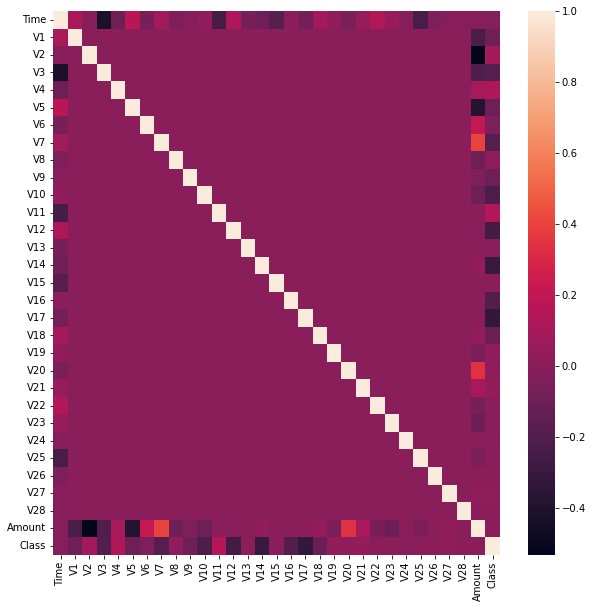

In [16]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr())
plt.show()

**Observation** : All the features beginning with letter 'V' are not correlated with one another. Time have some correlation with features V3,V11,V15, V25. Similarly, amount have some strong correlation with V2, V5. V6,V7,V20.
Class feature have some correlation with V10, V12, V14, V16, V17 but class label is categorical feature with values 0 and 1 only, so this correlation value may not be represent the actual correlation of other features and class label.

In [17]:
numeric_features = df.columns[df.columns != 'Class']

correlations = {}

for feature in numeric_features:
    correlation_coefficient, p_value = scipy.stats.pointbiserialr(df['Class'], df[feature])
    correlations[feature] = correlation_coefficient
    
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, correlation_coefficient in sorted_correlations:
    print(f"Correlation between 'Category' and '{feature}': {correlation_coefficient:.2f}")

    # Interpret the correlation
    if abs(correlation_coefficient) >= 0.7:
        interpretation = "Strong correlation"
    elif abs(correlation_coefficient) >= 0.3:
        interpretation = "Moderate correlation"
    else:
        interpretation = "Weak or no correlation"
    
    print(f"Interpretation: {interpretation}\n")






Correlation between 'Category' and 'V17': -0.33
Interpretation: Moderate correlation

Correlation between 'Category' and 'V14': -0.30
Interpretation: Moderate correlation

Correlation between 'Category' and 'V12': -0.26
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V10': -0.22
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V16': -0.20
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V3': -0.19
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V7': -0.19
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V11': 0.15
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V4': 0.13
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V18': -0.11
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V1': -0.10
Interpretation: Weak or no correlation

Correlation between 'Category' and 'V9': -

We can see that only two features V17 and V14 have some considerable correlation while other features have weak or no correlation at all. For classification problem, features having high correlation with class label is desirable as they provide significant information about the class label and therefore helps to make accurate prediction. 

We will drop some features V13, V15, V22, V25 based on the density plot and correlation value as they were found to be not useful feature for prediction.

### Dropping columns

In [18]:
df = df.drop(columns= ['V13', 'V15', 'V22', 'V25'])
df.shape

(284807, 27)

# Preparing Train and Test Data

### Scaling the data

Amount feature is in different scale compared to other, so we scale it so that its range is comparable to other features range. When features have different scales, large scale feature can dominate and give misleading feature importance.

In [19]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] =  sc.fit_transform(amount.reshape(-1,1))

In [20]:
df.describe()['Amount']

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [21]:
x = df.drop('Class', axis=1)
y =  df['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (227845, 26)
Shape of y_train : (227845,)
Shape of x_test : (56962, 26)
Shape of y_test : (56962,)


# Implementing models

## Helper Function

In [22]:
def fit_and_predict(classifier, x_train, y_train, x_test, y_test):
    
    start_time = time.time()
    classifier.fit(x_train, y_train)
    ypred = classifier.predict(x_test)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken for fitting and prediction: {elapsed_time} seconds")
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test, ypred))
    print("Accuracy Report")
    print(classification_report(y_test, ypred))
    print("Accuracy Score:", accuracy_score(y_test, ypred))
    print("Recall Score:", recall_score(y_test, ypred))
    print("Precision Score:", precision_score(y_test, ypred))
    
    x_test_new = x_test.copy()
    test_df = pd.DataFrame(x_test_new)
    test_df['Actual'] = y_test.values
    test_df['Predicted'] = ypred
    test_df.head()
    tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
    actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
    
    print("True Positives: ", tp)
    print("Accuracy for fraud cases: ", (tp / actual_positive))
    print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
    return roc_curve(y_test, ypred)


## Implementing model on unbalanced data

### Logistic Regression

In [23]:
Logistic_regression = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(Logistic_regression,x_train,y_train, x_test, y_test)

Time taken for fitting and prediction: 2.3055226802825928 seconds
Confusion Matrix
[[56832    32]
 [   48    50]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.51      0.56        98

    accuracy                           1.00     56962
   macro avg       0.80      0.75      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9985955549313578
Recall Score: 0.5102040816326531
Precision Score: 0.6097560975609756
True Positives:  50
Accuracy for fraud cases:  0.5102040816326531
ROC AUC Score:  0.7548206677155949


### RandomForest Classifier

In [24]:
Random_forest =  RandomForestClassifier()
randomforest_fp, randomforest_tp, randomforest_threshold = fit_and_predict(Random_forest,x_train,y_train, x_test, y_test)

Time taken for fitting and prediction: 172.6393904685974 seconds
Confusion Matrix
[[56863     1]
 [   20    78]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9996313331694814
Recall Score: 0.7959183673469388
Precision Score: 0.9873417721518988
True Positives:  78
Accuracy for fraud cases:  0.7959183673469388
ROC AUC Score:  0.8979503907640715


### Decision Tree

In [25]:
decision_tree = DecisionTreeClassifier()
dt_fp, dt_tp, dt_threshold = fit_and_predict(decision_tree,x_train,y_train, x_test, y_test)

Time taken for fitting and prediction: 12.494162321090698 seconds
Confusion Matrix
[[56834    30]
 [   23    75]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.77      0.74        98

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9990695551420246
Recall Score: 0.7653061224489796
Precision Score: 0.7142857142857143
True Positives:  75
Accuracy for fraud cases:  0.7653061224489796
ROC AUC Score:  0.882389273942554


### AdaBoost

In [26]:
ada_b = AdaBoostClassifier(n_estimators = 100, random_state = 0)
ada_fp, ada_tp, ada_threshold = fit_and_predict(ada_b,x_train,y_train, x_test, y_test)

Time taken for fitting and prediction: 91.46185326576233 seconds
Confusion Matrix
[[56856     8]
 [   22    76]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9994733330992591
Recall Score: 0.7755102040816326
Precision Score: 0.9047619047619048
True Positives:  76
Accuracy for fraud cases:  0.7755102040816326
ROC AUC Score:  0.8876847587656335


### XGBoost

In [27]:
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb,x_train,y_train, x_test, y_test)

Time taken for fitting and prediction: 22.703893184661865 seconds
Confusion Matrix
[[56862     2]
 [   22    76]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9995786664794073
Recall Score: 0.7755102040816326
Precision Score: 0.9743589743589743
True Positives:  76
Accuracy for fraud cases:  0.7755102040816326
ROC AUC Score:  0.8877375162220206


### Plotting ROC Curve

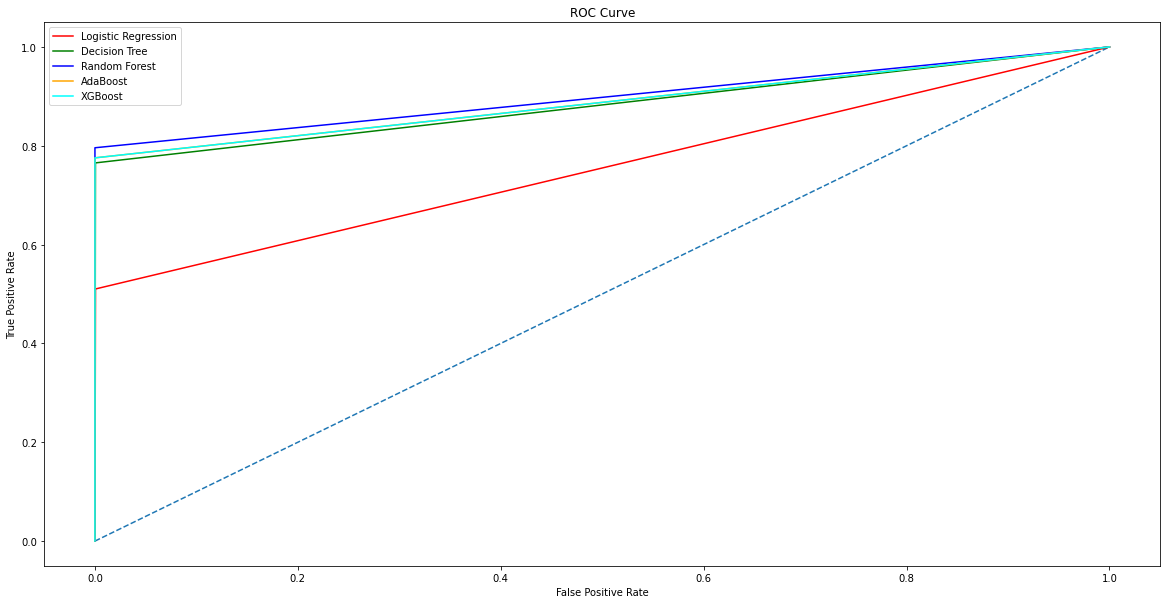

In [28]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dt_fp, dt_tp, color="green", label = "Decision Tree")
plt.plot(randomforest_fp, randomforest_tp, color="blue", label = "Random Forest")
plt.plot(ada_fp, ada_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

## Implementing model on balanced data

Earlier we observed that out dataset is highly unbalanced as we have more number of observation for non-fraud class compared to fraud class. Therefore, we will create a model using the balanced dataset. In order to create a balanced dataset, we will oversample non-fraud dataset until the number of sample for both classes are equal.

### Oversampling the rare class

In [29]:
print("Class distribution before SMOTE:", Counter(y_train))

smote = SMOTE(sampling_strategy='auto', random_state=42)  
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution before SMOTE: Counter({0: 227451, 1: 394})
Class distribution after SMOTE: Counter({0: 227451, 1: 227451})


### Logistic Regression

In [30]:
Logistic_regression = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(Logistic_regression,x_train_resampled,y_train_resampled, x_test, y_test)

Time taken for fitting and prediction: 1.3900494575500488 seconds
Confusion Matrix
[[54988  1876]
 [   11    87]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Accuracy Score: 0.9668726519434009
Recall Score: 0.8877551020408163
Precision Score: 0.04431991849210392
True Positives:  87
Accuracy for fraud cases:  0.8877551020408163
ROC AUC Score:  0.9273820529900199


### RandonForest Classifier

In [31]:
Random_forest =  RandomForestClassifier()
randomforest_fp, randomforest_tp, randomforest_threshold = fit_and_predict(Random_forest,x_train_resampled,y_train_resampled, x_test, y_test)

Time taken for fitting and prediction: 320.47482800483704 seconds
Confusion Matrix
[[56854    10]
 [   16    82]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9995435553526912
Recall Score: 0.8367346938775511
Precision Score: 0.8913043478260869
True Positives:  82
Accuracy for fraud cases:  0.8367346938775511
ROC AUC Score:  0.9182794178447969


### Decision Tree Classifier

In [32]:
decision_tree = DecisionTreeClassifier()
dt_fp, dt_tp, dt_threshold = fit_and_predict(decision_tree,x_train_resampled,y_train_resampled, x_test, y_test)

Time taken for fitting and prediction: 32.66396403312683 seconds
Confusion Matrix
[[56745   119]
 [   20    78]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.80      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.997559776693234
Recall Score: 0.7959183673469388
Precision Score: 0.39593908629441626
True Positives:  78
Accuracy for fraud cases:  0.7959183673469388
ROC AUC Score:  0.8969128274551238


### AdaBoost

In [33]:
decision_tree = DecisionTreeClassifier()
dt_fp, dt_tp, dt_threshold = fit_and_predict(decision_tree,x_train_resampled,y_train_resampled, x_test, y_test)

Time taken for fitting and prediction: 32.58953070640564 seconds
Confusion Matrix
[[56756   108]
 [   21    77]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.79      0.54        98

    accuracy                           1.00     56962
   macro avg       0.71      0.89      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9977353323268143
Recall Score: 0.7857142857142857
Precision Score: 0.41621621621621624
True Positives:  77
Accuracy for fraud cases:  0.7857142857142857
ROC AUC Score:  0.8919075086421737


### XGBoost

In [34]:
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb,x_train_resampled,y_train_resampled, x_test, y_test)

Time taken for fitting and prediction: 29.076793670654297 seconds
Confusion Matrix
[[56844    20]
 [   14    84]]
Accuracy Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.999403110845827
Recall Score: 0.8571428571428571
Precision Score: 0.8076923076923077
True Positives:  84
Accuracy for fraud cases:  0.8571428571428571
ROC AUC Score:  0.9283955703834713


### Plotting ROC Curve

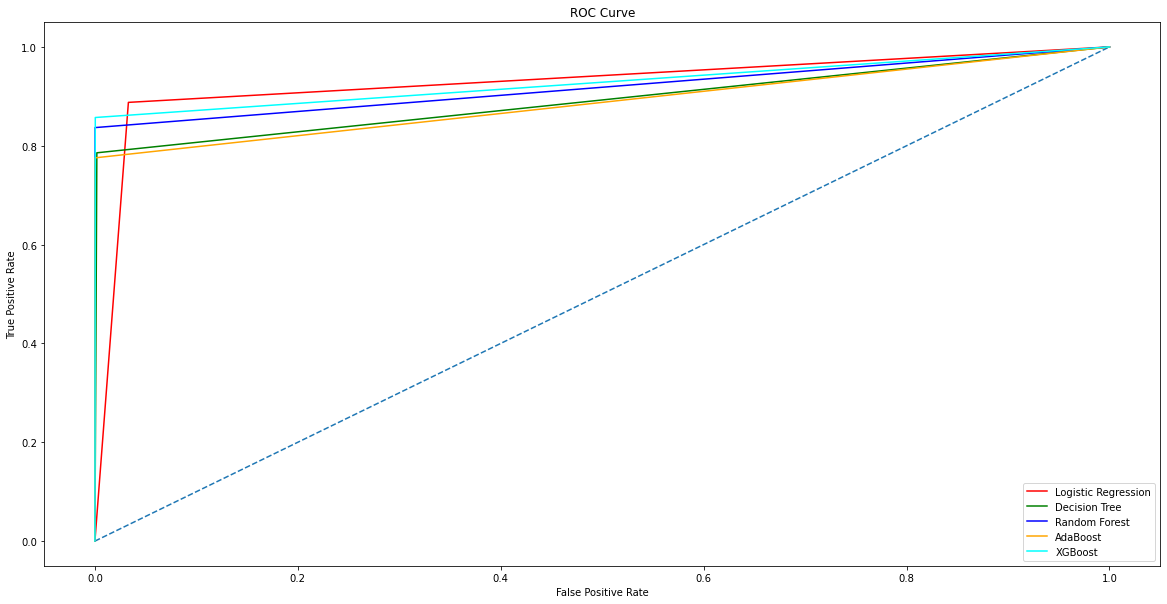

In [35]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dt_fp, dt_tp, color="green", label = "Decision Tree")
plt.plot(randomforest_fp, randomforest_tp, color="blue", label = "Random Forest")
plt.plot(ada_fp, ada_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# Conclusion

In this project, we implemented a machine learning model for credict card fraud detection. 
From our analysis we observed the following:
